In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from os.path import join, basename
from os import getcwd
import pickle

In [3]:
pickle_files = glob(join(getcwd(), "*.p"))
pickle_files

['/mnt/D/estagio_lip_2/generate_tables/non_zeros_ht.p',
 '/mnt/D/estagio_lip_2/generate_tables/non_zeros_R2.p',
 '/mnt/D/estagio_lip_2/generate_tables/non_zeros_WD.p',
 '/mnt/D/estagio_lip_2/generate_tables/paper_herwig_ht.p',
 '/mnt/D/estagio_lip_2/generate_tables/paper_herwig_R2.p',
 '/mnt/D/estagio_lip_2/generate_tables/paper_herwig_WD.p']

In [4]:
book = {}

for file in pickle_files:
    book[basename(file).replace(".p", "")] = pickle.load( open(file, "rb") )

In [9]:
def create_table(files):
    book = {}

    for file in files:
        book[basename(file).replace(".p", "")] = pickle.load( open(file, "rb") )
        
    colLabels = list(book.keys())
    rowLabels = list(book[list(book.keys())[0]].keys())

    cellText = []
    for signal_label in rowLabels:
        cellText.append([])

        for item in book.items():
            item = item[1]
            cellText[-1].append(round(item[signal_label], 8))
    if len(colLabels) == 3:
        hierarchy_colors = ["#FF0D0D",  "#FAB733",  "#69B34C"] # bad to best
    else:
        hierarchy_colors = ["#FF0D0D", "#FF4E11", "#FF8E15", "#FAB733", "#ACB334", "#69B34C"]
    cell_colors = []

    for signal in cellText:
        cell_colors.append([])
        sorted_list = sorted(signal)
        for value in signal:
            index = sorted_list.index(value)
            cell_colors[-1].append(hierarchy_colors[index])

    fig, ax = plt.subplots()#figsize=(10,10))
    clust_data = np.random.random((5,3))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=cellText,colLabels=colLabels,loc='center', rowLabels=rowLabels, cellColours=cell_colors,
            fontsize=50, cellLoc='center',colColours=["#d8d8d8" for x in range(len(colLabels))], rowColours=["#d8d8d8" for x in range(len(rowLabels))])
    table.set_fontsize(30)
    table.scale(5, 5)
    plt.show()

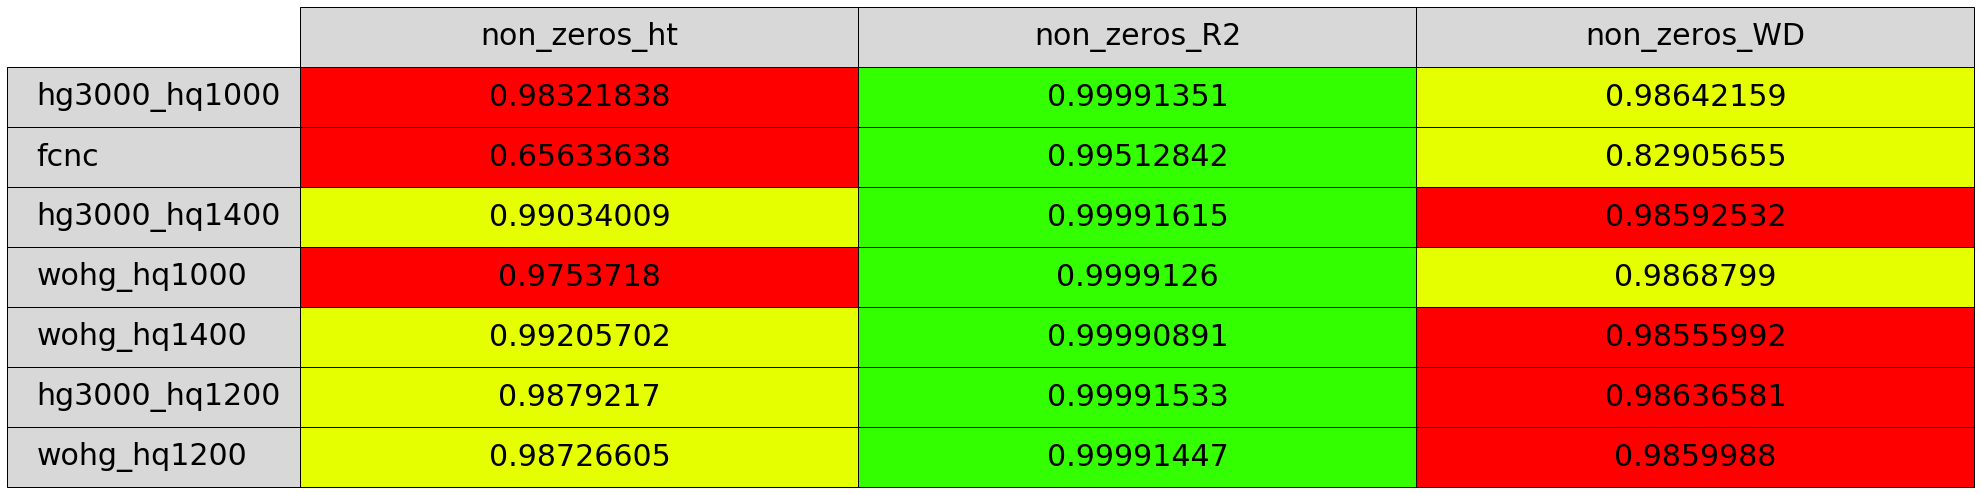

In [10]:
create_table([x for x in pickle_files if "zeros" in x])

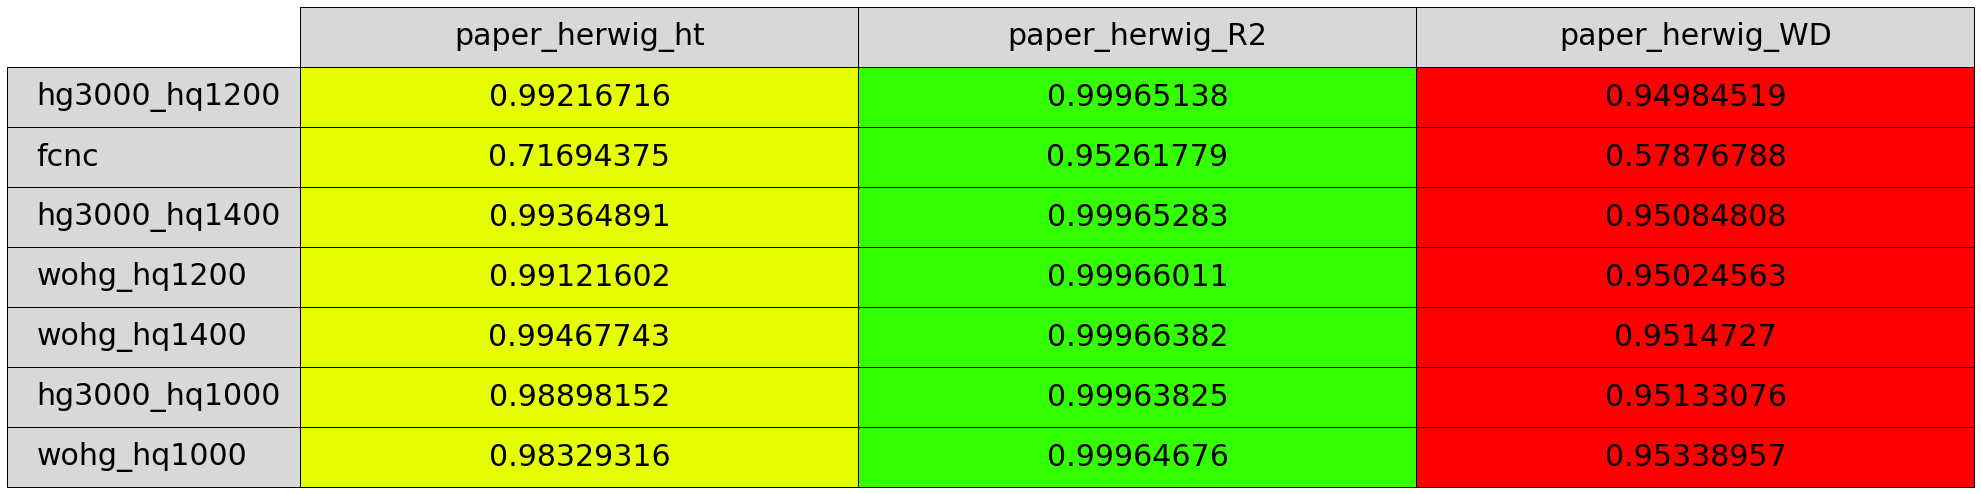

In [11]:
create_table([x for x in pickle_files if "paper" in x])

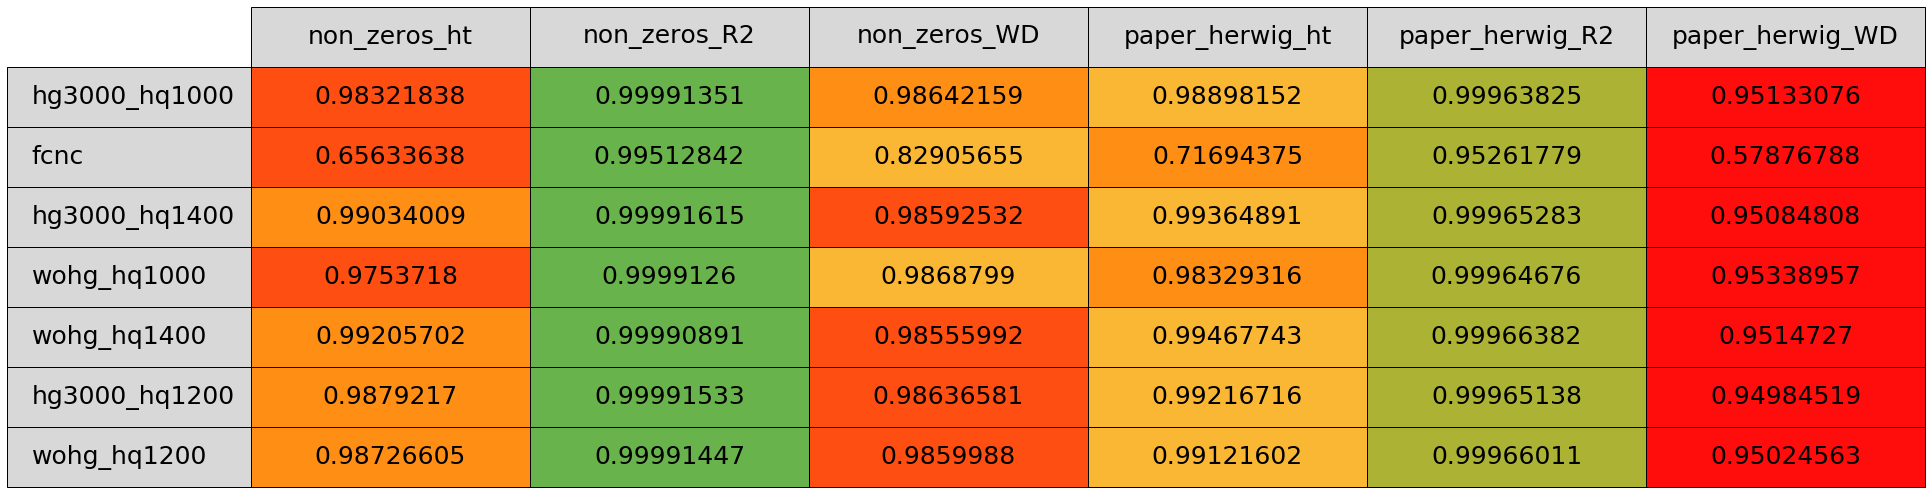

In [12]:
create_table(pickle_files)